# **Data Prediction**

### **Requirements**

1. pandas
2. matplotlib
3. scikit-learn
4. pickle

#### **Installing the requirements**

In [2]:
pip install pandas matplotlib scikit-learn

  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl (38.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------

###

### **Importing libraries**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

#

# **Working on the model**

### **Getting the data**

In [8]:
df = pd.read_csv("../dataset/admission_chances.csv")
df.columns = df.columns.str.strip()

df.head()

###

### **Splitting the data**

In [10]:
X = df[["gre", "toefl", "rating", "sop", "lor", "cgpa", "research"]]
y = df["chance"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####

## **Linear Regression**

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#####

#### **R2 Score and MSE for Linear Regression**

In [13]:
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

In [17]:
print("R2 Score: ", lr_r2)
print("MSE: ", lr_mse)

R2 Score:  0.8212082591486991
MSE:  0.004617003377285012


####

## **Random Forest**

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#####

In [16]:
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

In [18]:
print("R2 Score: ", rf_r2)
print("MSE: ", rf_mse)

R2 Score:  0.8066077140670239
MSE:  0.004994038499999999


###

### **Linear Regression vs Random Forest**

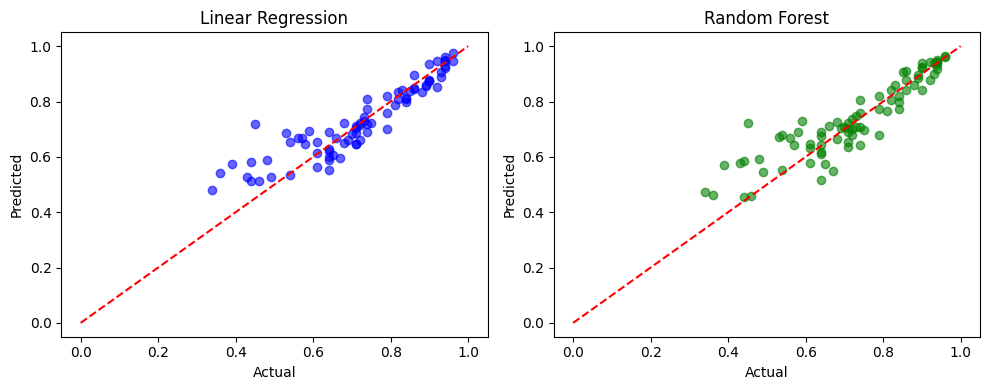

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(y_test, lr_pred, alpha=0.6, color="blue")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, rf_pred, alpha=0.6, color="green")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

####

Although they are very close, Linear Regression has a slight edge of Random Forest due to having a better R2 Score and less MSE.

Therefore, we will be using Linear Regression as the final prediction model.

####

## **Exporting the model**

In [22]:
with open("../model/prediction.pkl", "wb") as f:
    pickle.dump(lr_model, f)